# Checking out some instances to check if everything works fine

In [1]:
# import the stuff
from cetsp_bnb2 import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, compute_tour_from_sequence

In [2]:
# Load instances
import aemeasure
db_ = aemeasure.Database("instance_db")
data = db_.load()
instances = {instance["instance"]: instance  for instance in data}

In [3]:
list(instances.keys())

['srpg_octa0000092/upper_bound_70.json',
 'srpg_octa0000092/upper_bound_27.json',
 'srpg_octa0000092/upper_bound_31.json',
 'srpg_octa0000092/upper_bound_66.json',
 'srpg_octa0000092/upper_bound_5.json',
 'srpg_octa0000092/upper_bound_9.json',
 'srpg_octa0000092/upper_bound_11.json',
 'srpg_octa0000092/upper_bound_46.json',
 'srpg_octa0000092/upper_bound_50.json',
 'srpg_octa0000092/lower_bound_2.json',
 'srpg_octa0000092/upper_bound_51.json',
 'srpg_octa0000092/upper_bound_47.json',
 'srpg_octa0000092/upper_bound_8.json',
 'srpg_octa0000092/upper_bound_10.json',
 'srpg_octa0000092/upper_bound_4.json',
 'srpg_octa0000092/upper_bound_67.json',
 'srpg_octa0000092/upper_bound_30.json',
 'srpg_octa0000092/upper_bound_26.json',
 'srpg_octa0000092/upper_bound_71.json',
 'srpg_octa0000092/upper_bound_17.json',
 'srpg_octa0000092/upper_bound_40.json',
 'srpg_octa0000092/upper_bound_56.json',
 'srpg_octa0000092/upper_bound_21.json',
 'srpg_octa0000092/upper_bound_37.json',
 'srpg_octa0000092/up

In [4]:
instance = Instance([Circle(Point(float(d["x"]), float(d["y"])), float(d["radius"])) for d in instances['srpg_octa0000092/lower_bound_2.json']["circles"]])

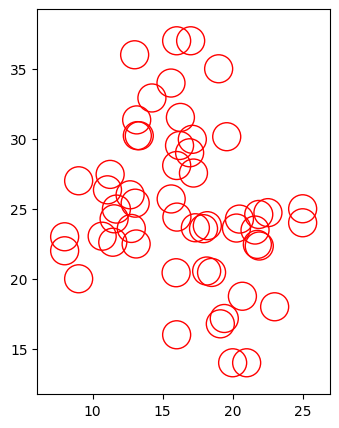

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [6]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


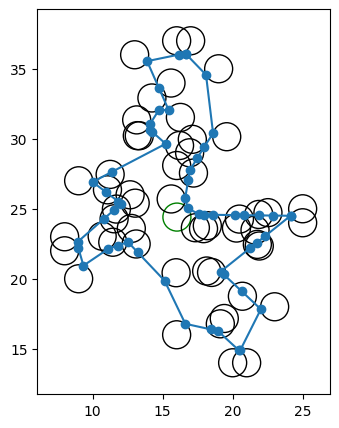

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution, highlight=[15])

Using node simplification.
Using ChFarthestCircle-Branching
Starting with root node of size 14
i	LB	|	UB


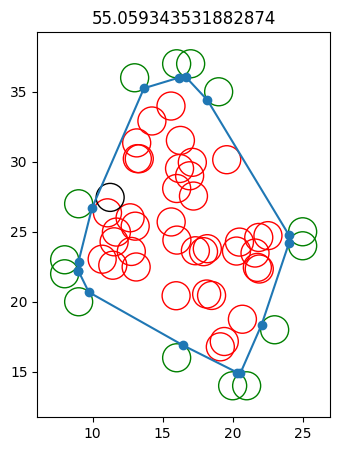

0	60.2736	|	73.3274
1	60.3318	|	73.3274
2	60.3318	|	73.3274
3	60.3318	|	73.3274
4	60.3318	|	73.3274
5	60.3318	|	73.3274
6	60.3318	|	73.3274
7	60.3318	|	73.3274
8	60.3318	|	73.3274
9	60.3318	|	73.3274
10	60.3318	|	73.3274
20	60.3318	|	73.3274
30	61.21	|	71.0407
40	61.21	|	71.0407
50	62.4745	|	69.8975
60	63.1555	|	69.8975
70	63.1555	|	69.8975
80	63.3262	|	69.7232
90	63.8325	|	69.7232


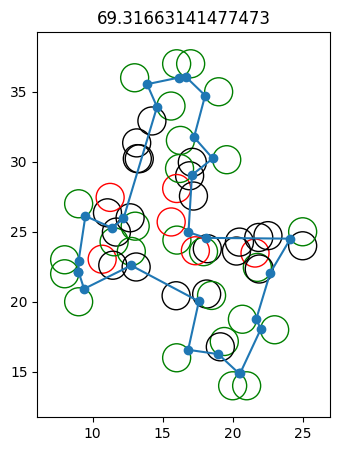

100	63.8325	|	69.7232


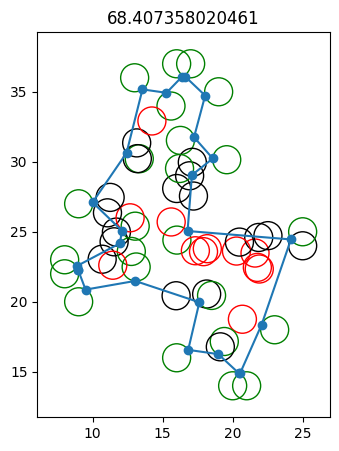

200	65.8848	|	69.4942
300	66.8885	|	68.8486
400	67.6593	|	68.8486
500	67.9918	|	68.8486
---------------
551	68.1792	|	68.8486


In [8]:
timelimit = 220
node_values = []
def count(event):
    global node_values
    node_values.append(event.current_node.get_relaxed_solution().length())
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    depth = event.current_node.depth()

    if event.num_iterations % 100 == 0:
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.title(event.get_relaxed_solution().length())
        plt.show()
        
opt_solution, lb = branch_and_bound(instance, count, initial_solution, timelimit)

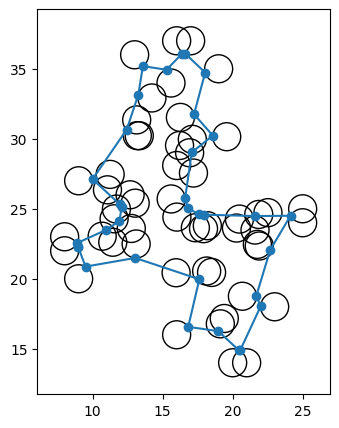

In [9]:
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)